In [ ]:
!nvidia-smi

Tue Feb 27 19:12:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 292MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 69.9MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 221.0ms
Speed: 18.2ms preprocess, 221.0ms inference, 1433.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WsuqByCtRlw38TgrmEIA")
project = rf.workspace("abhisheks").project("helmet_numberplate-detection-6nvyh")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet_Numberplate-Detection--1 in yolov8:: 100%|██████████| 1584/1584 [00:00<00:00, 3071.80it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.1.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Helmet_Numberplate-Detection--1/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_widt

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   labels.jpg	     train_batch1.jpg
events.out.tfevents.1709061261.30e538a0e79f.884.0  results.csv	     train_batch2.jpg
labels_correlogram.jpg				   train_batch0.jpg  weights


/content


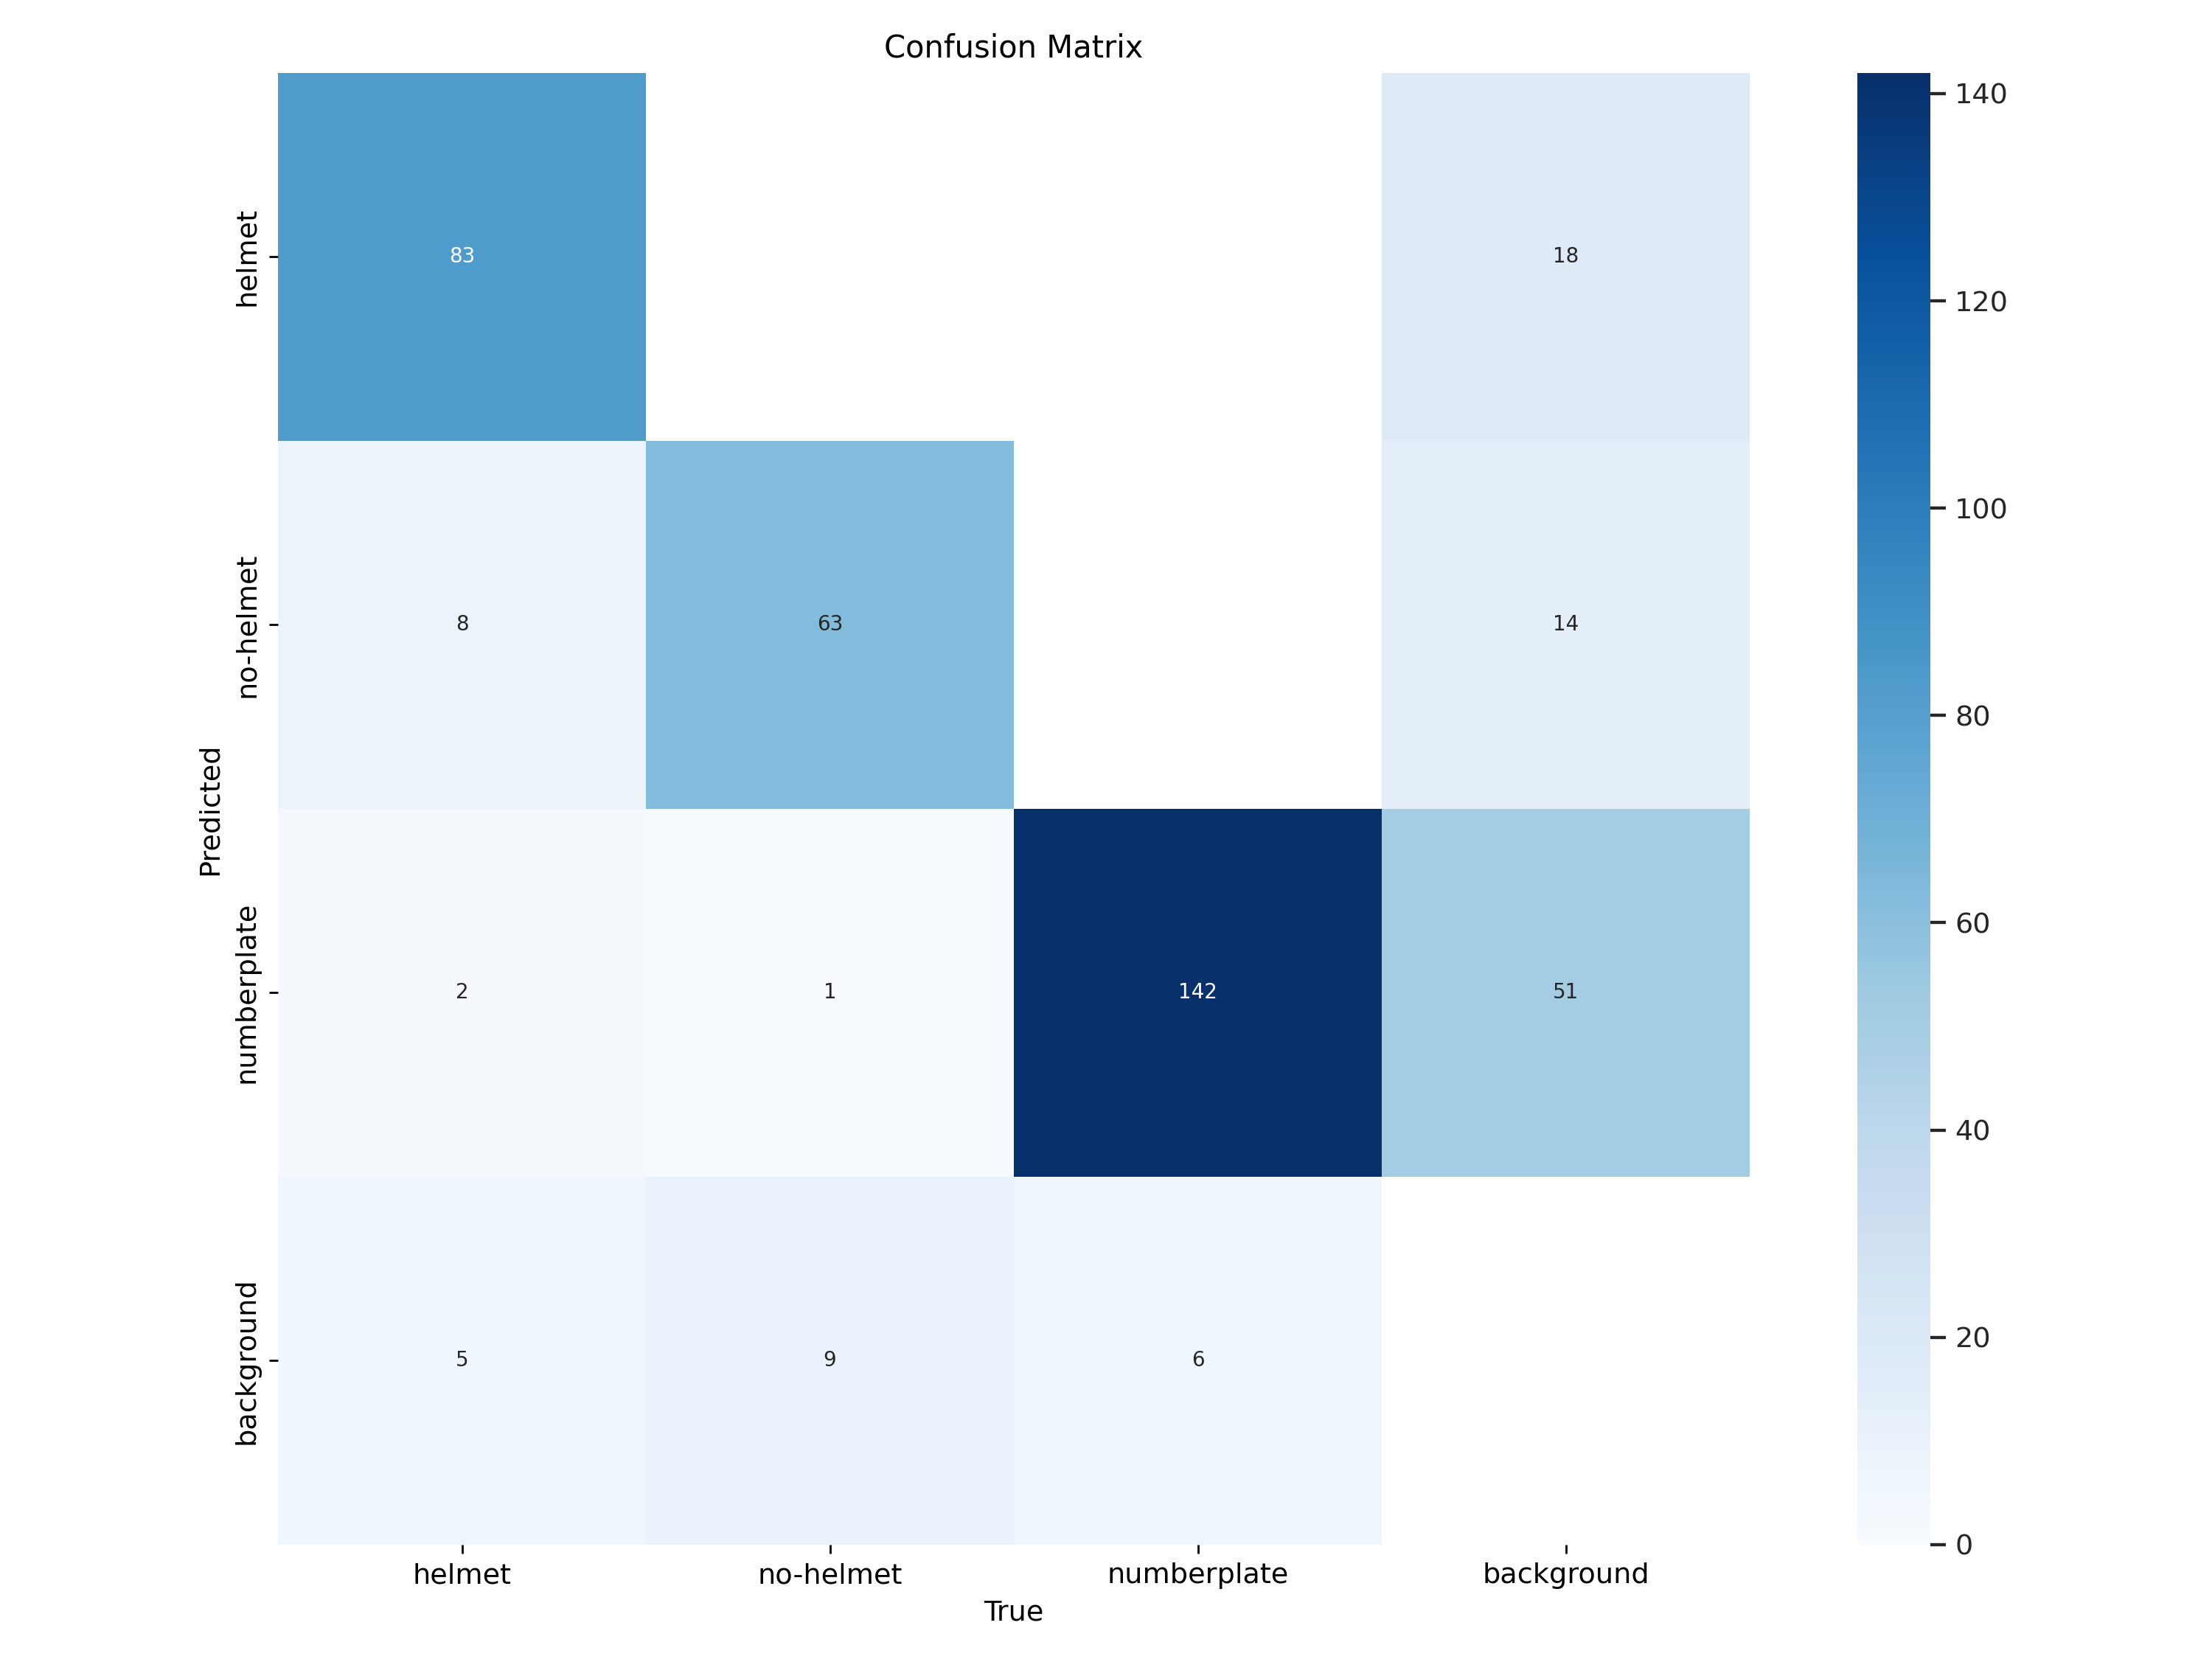

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


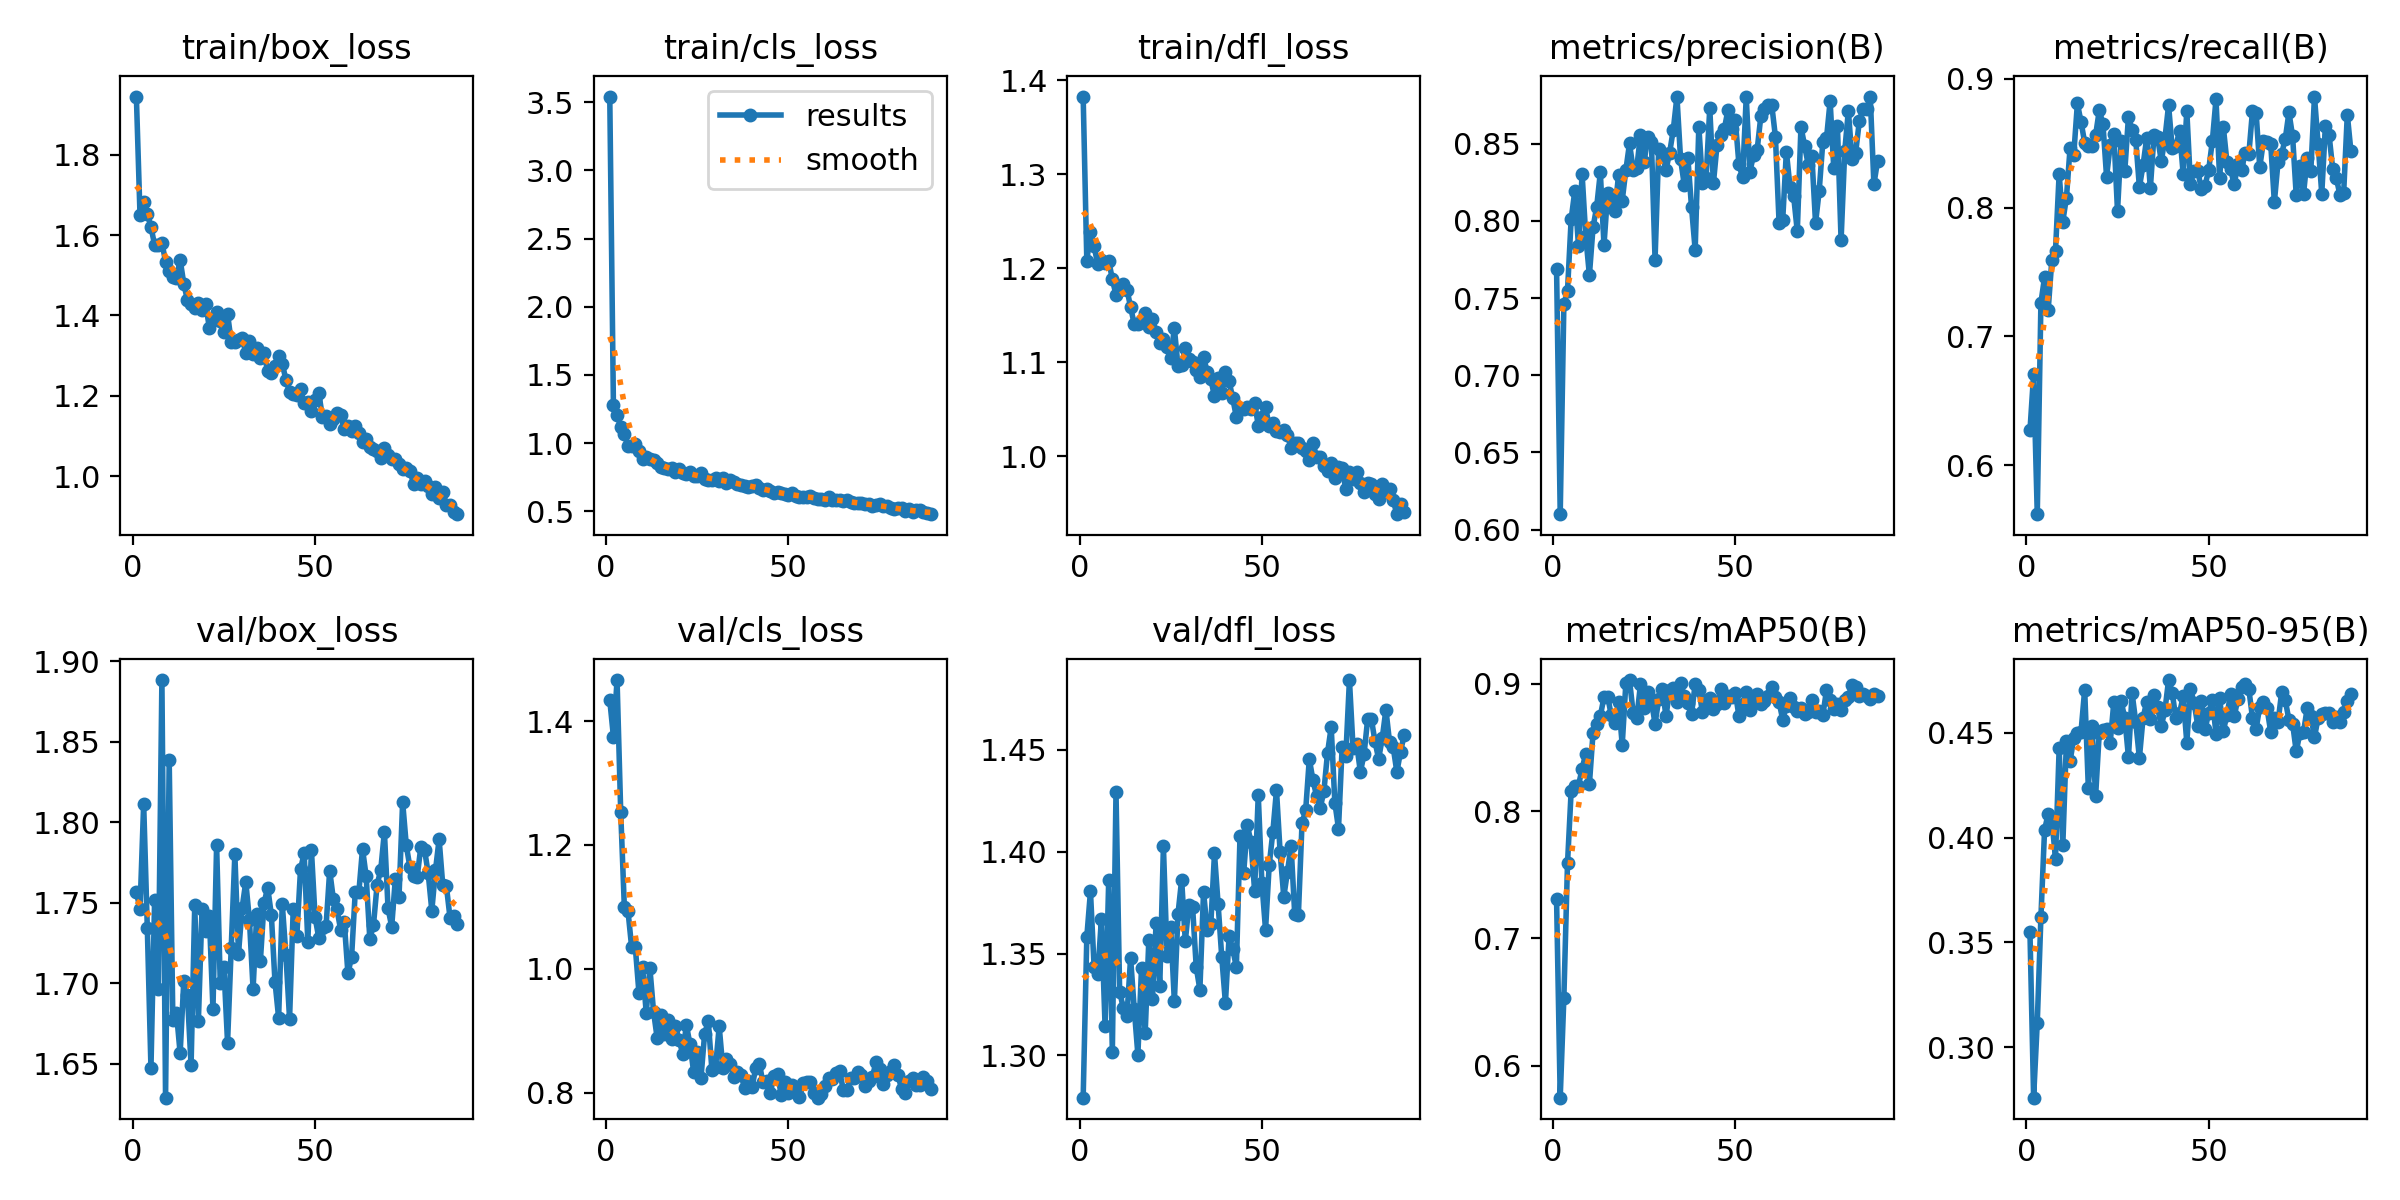

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


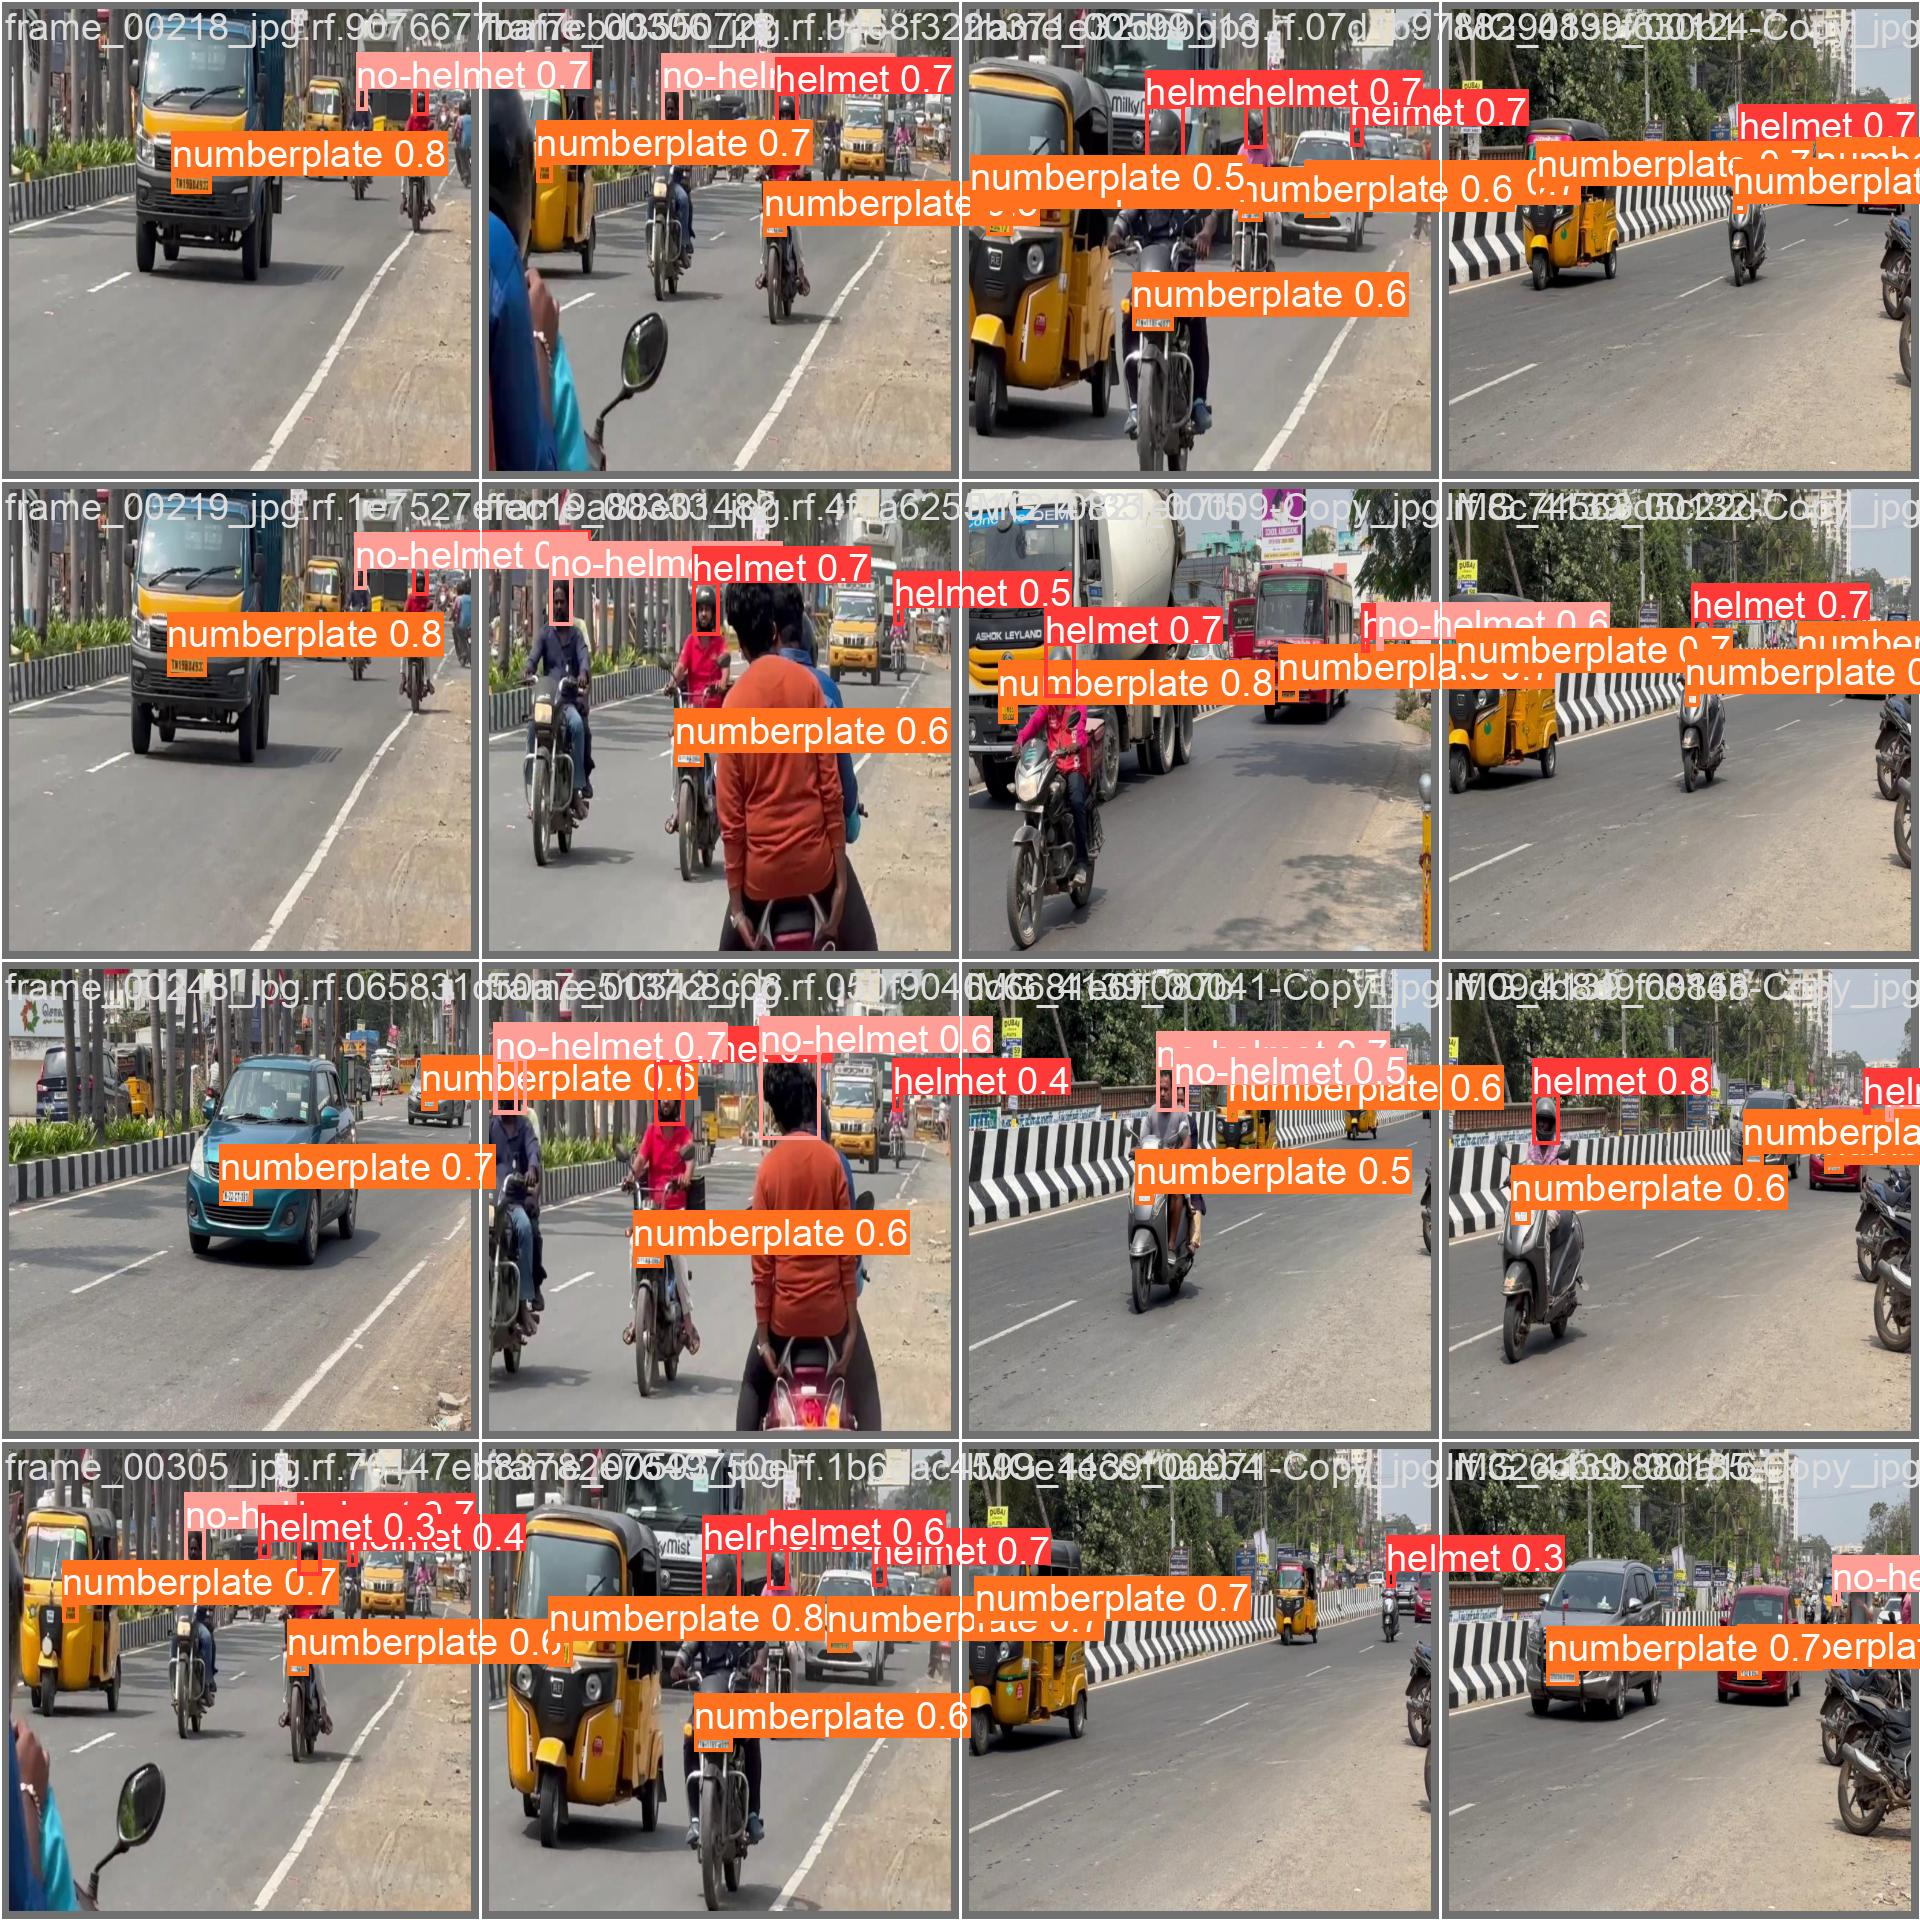

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Helmet_Numberplate-Detection--1/valid/labels.cache... 102 images, 0 backgrounds, 0 corrupt: 100% 102/102 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.01it/s]
                   all        102        319      0.765      0.648       0.73      0.355
                helmet        102         98      0.746      0.631      0.745      0.395
             no-helmet        102         73       0.81      0.562      0.671      0.322
           numberplate        102        148      0.739       0.75      0.774      0.349
Speed: 6.7ms preprocess, 21.7ms inference, 0.0ms loss, 11.4ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/51 /content/datasets/Helmet_Numberplate-Detection--1/test/images/IMG_4139_00045-Copy_jpg.rf.036c7a5f1561e151331f5ba2a06a4029.jpg: 800x800 2 no-helmets, 1 numberplate, 22.5ms
image 2/51 /content/datasets/Helmet_Numberplate-Detection--1/test/images/IMG_4139_00046-Copy_jpg.rf.79263d6178be1beecf31d195d81e1e54.jpg: 800x800 2 no-helmets, 2 numberplates, 23.2ms
image 3/51 /content/datasets/Helmet_Numberplate-Detection--1/test/images/IMG_4139_00052-Copy_jpg.rf.7ec1a6e2741ca1a1bec88e5fb29dba02.jpg: 800x800 1 helmet, 2 no-helmets, 2 numberplates, 22.5ms
image 4/51 /content/datasets/Helmet_Numberplate-Detection--1/test/images/IMG_4139_00053-Copy_jpg.rf.d36fb0574d06f182bd7c9f221677b54e.jpg: 800x800 1 helmet, 2 no-helmets, 2 numberplates, 22.4ms
image 5/51 /content/datasets

**NOTE:** Let's take a look at few results.

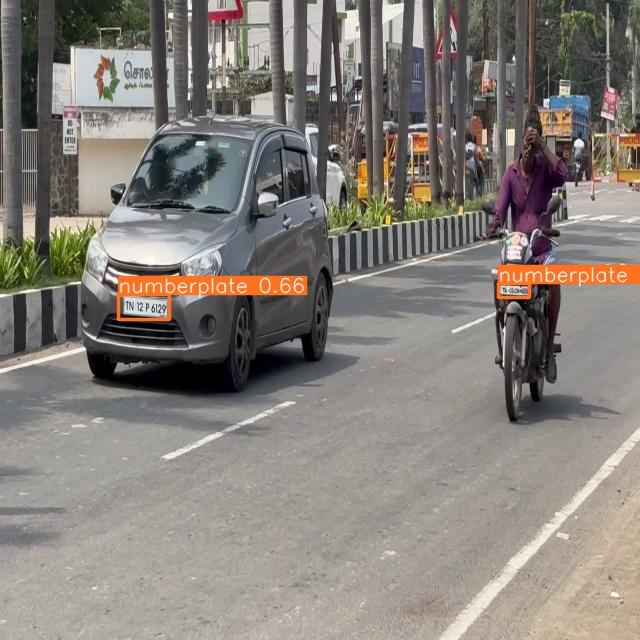

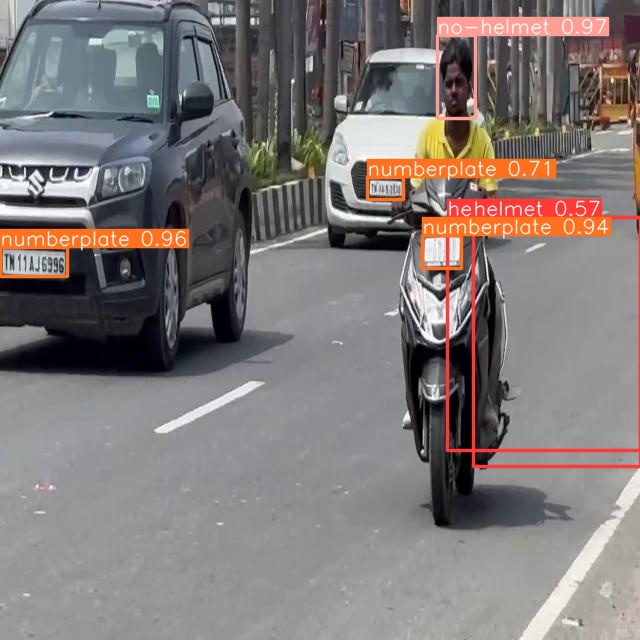

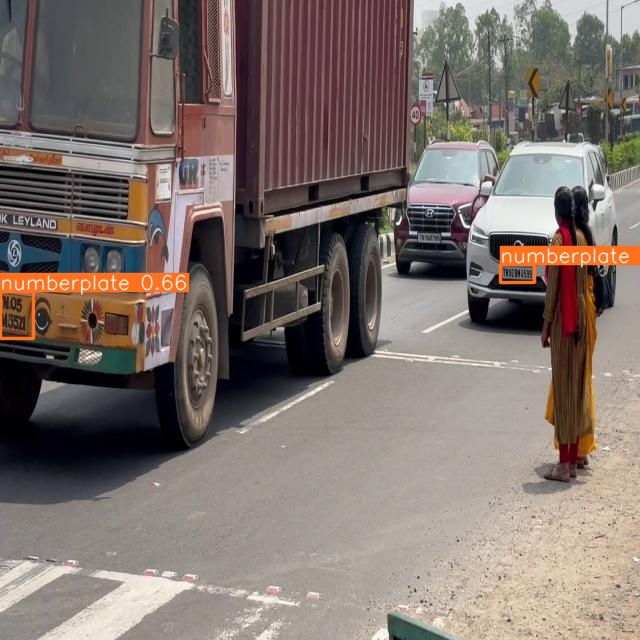

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on frame_00877_jpg.rf.2c35895b1c8b3da74c57cfbc3aab67b7.jpg


{'predictions': [{'x': 184.0,
   'y': 339.5,
   'width': 50.0,
   'height': 23.0,
   'confidence': 0.8558354377746582,
   'class': 'numberplate',
   'class_id': 2,
   'detection_id': '4fa4f303-6387-4ae6-a66c-5acc12962956',
   'image_path': '/content/datasets/Helmet_Numberplate-Detection--1/test/images/frame_00877_jpg.rf.2c35895b1c8b3da74c57cfbc3aab67b7.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 351.5,
   'y': 184.0,
   'width': 15.0,
   'height': 30.0,
   'confidence': 0.6677109599113464,
   'class': 'no-helmet',
   'class_id': 1,
   'detection_id': '413a0b5a-44d8-477a-9eb1-61886645be21',
   'image_path': '/content/datasets/Helmet_Numberplate-Detection--1/test/images/frame_00877_jpg.rf.2c35895b1c8b3da74c57cfbc3aab67b7.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 450.0,
   'y': 217.0,
   'width': 18.0,
   'height': 10.0,
   'confidence': 0.4788682162761688,
   'class': 'numberplate',
   'class_id': 2,
   'detection_id': 'e9a98dcd-4509-4c45-aedc-3bd0e5ea